# Linear and logistic regression modeling - illustration using NHANES data

This notebook introduces two statistical modeling techniques: linear regression and logistic regression.  The focus here will be on fitting these two types of models to data using Python statistical modeling libraries in the Jupyter notebook environment.  As with several previous case studies in this course, here we will be analyzing the [NHANES](https://www.cdc.gov/nchs/nhanes/index.htm) data, allowing us to illustrate the use of these two regression methods by addressing meaningful questions with actual data.

Regression analysis is a broad class of statistical methods that aim to explain the variation of one variable (the "outcome", "response", or "dependent variable") in terms of one or more "explanatory variables" (also known as "covariates" or "predictors").  It can be used to describe how variables are related, and in some cases can give insights into causal or mechanistic relationships.  However it is important to keep in mind that many regression analyses are only capable of describing associations and it may be misleading to interpret such relationships as representing causal effects.

Note that the NHANES data were collected as a sample survey intended to represent the population of the United States. These data are a *complex survey* and are accompanied with survey design information such as weights, strata, and clusters.  In many analyses, this survey design information should be used in the analysis to properly reflect the target population.  But to introduce how linear and logistic regression are used with independent data samples, or with convenience samples, we will not incorporate the survey structure of the NHANES sample into the analyses conducted here.

As with our previous work, we will be using the
[Pandas](http://pandas.pydata.org) library for data management, the
[Numpy](http://www.numpy.org) library for numerical calculations, and
the [Statsmodels](http://www.statsmodels.org) library for statistical
modeling.

We begin by importing the libraries that we will be using.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

Next we will load the data.  The NHANES study encompasses multiple waves of data collection.  Here we will only use the 2015-2016 data.  As with most data sets, there are some missing values in the NHANES files.  While many of the methods demonstrated below would handle missing values automatically, here we explicitly drop all observations with missing values in any of the key variables that we will use in this notebook.  This is called *complete case analysis*.

In [2]:
# Read the 2015-2016 wave of NHANES data
da = pd.read_csv("nhanes_2015_2016.csv")

# Drop unused columns, and drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
da = da[vars].dropna()

In [3]:
da.shape

(5102, 7)

In [4]:
da.head()

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020
0,128.0,62,1,3,5.0,27.8,1
1,146.0,53,1,3,3.0,30.8,1
2,138.0,78,1,3,3.0,28.8,1
3,132.0,56,2,3,5.0,42.4,2
4,100.0,42,2,4,4.0,20.3,2


## Linear regression

We will focus initially on regression models in which systolic [blood pressure](https://en.wikipedia.org/wiki/Blood_pressure) (SBP) is the outcome (dependent) variable.  That is, we will
predict a subject's SBP from other variables relating to that subject.  SBP is an important indicator of
cardiovascular health.  It tends to increase with age, is greater for overweight people (i.e. people with greater body mass index or BMI), and also differs among demographic groups, for example among gender and ethnic groups.

Here we will model SBP using linear regression.  Linear regression is the most widely-utilized form of statistical regression.  While linear regression is commonly used with quantitative outcome variables, it is not the only type of regression model that can be used with quantitative outcomes, nor is it the case that linear regression can only be used with quantitative outcomes. However, linear regression is a good default starting point for any regression analysis using a quantitative outcome variable.

### Interpreting regression parameters in a basic model

We start with a simple linear regression model with only one covariate, age, predicting SBP.  In the NHANES data, the variable [BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) contains the first recorded measurement of SBP for a subject, and [RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR) is the subject's age in years.  The model that is fit in the next cell expresses the expected value of SBP as a linear function of age.  The formula `BPXSY1 ~ RIDAGEYR` indicates that the variable named `BPXSY1` is the response variable in this regression analysis, and the analysis has one covariate, which is `RIDAGEYR`.

In [5]:
model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     1333.
Date:                Sun, 30 Jun 2024   Prob (F-statistic):          2.09e-259
Time:                        04:03:05   Log-Likelihood:                -21530.
No. Observations:                5102   AIC:                         4.306e+04
Df Residuals:                    5100   BIC:                         4.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.0935      0.685    149.120      0.000     100.751     103.436
RIDAGEYR       0.4759      0.013     36.504      0.000       0.450       0.501
==============================================================================
Omnibus:                      690.261   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1505.999
Skew:                           0.810   Prob(JB):                         0.00
Kurtosis:                       5.112   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Much of the output above is not relevant for us, so focus on the center section of the output where the header row begins with __coef__.  This section contains the estimated values of the parameters of the regression model, their standard
errors, and other values that are used to quantify the uncertainty in the regression parameter estimates.  Note that the regression parameters may also be referred to as *slopes* or *effects*.

This fitted model implies that when
comparing two people whose ages differ by one year, the older person
will on average have 0.48 units higher SBP than the younger person.
This difference is statistically significant, based on the p-value
shown under the column labeled __`P>|t|`__.  This means that there
is strong evidence that there is a real association between between systolic blood
pressure and age in this population.

SBP is measured in units of *millimeters of mercury*, expressed
*mm/Hg*.  In order to better understand the meaning of the estimated
regression parameter 0.48, we can look at the standard deviation of SBP:

In [6]:
da.BPXSY1.std()

18.486559500781865

The standard deviation of around 18.5 describes the *unexplained variation* in systolic blood pressure values.  It is large compared to the regression slope of 0.48, which describes the average difference between blood pressure values for two people whose ages differ by one year. It is important to note that the regression effect accumulates with age.  Comparing a 40 year-old person to a 60 year-old person, there is a 20 year difference in age, which translates into a
$20 \cdot 0.48 = 9.6$ unit difference in average SBP between these two people.  This difference is around half of one standard deviation.  Thus, while there is a substantial tendency for blood pressure to increase with age, there is also a great deal of variation among people with the same age -- we should not be surprised to find, say, a 40 year old with greater blood pressure than a 60 year old.

### R-squared and correlation

In the case of regression with a single independent variable, as we have here, there is a very close correspondence between the regression analysis and a Pearson correlation analysis, which we have discussed earlier in course 2. The primary summary statistic for assessing the strength of a predictive relationship in a linear regression model is the *R-squared*, which is shown to be 0.207 in the regression output above.  This means that 21% of the variation in SBP is explained by age.  Note that this value is exactly the same as the squared Pearson correlation coefficient between SBP and age, as shown below.

In [7]:
cc = da[["BPXSY1", "RIDAGEYR"]].corr()
print(cc.BPXSY1.RIDAGEYR**2)

0.2071545962518702


There is a second way to interpret the R-squared, which makes use
of the *fitted values* of the regression.  The fitted values are
predictions of the blood pressure for each person in the data
set, based on their covariate values.  In this example, the only
covariate is age, so we are predicting each NHANES subject's
blood pressure as a function of their age.  If we calculate
the Pearson correlation coefficient between the fitted values
from the regression, and the actual SBP values, and then square
this correlation coefficient, we see
that we also get the R-squared from the regression:

In [8]:
cc = np.corrcoef(da.BPXSY1, result.fittedvalues)
print(cc[0, 1]**2)

0.2071545962518697


Thus, we see that in a linear model fit with only one covariate,
the regression R-squared is equal to the squared Pearson
correlation between the covariate and the outcome, and is also
equal to the squared Pearson correlation between the fitted
values and the outcome.

### Adding a second variable to the linear model

Above we considered a simple linear regression analysis with only one
covariate (age) predicting systolic blood pressure (SBP).  The real
power of regression analysis arises when we have more than one
covariate predicting an outcome.  As noted above, SBP is expected to
be related to gender as well as to age, so we next add gender to the
model.  The NHANES variable for gender is named
[RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR).

We begin by creating a relabeled version of the gender variable:

In [9]:
# Create a labeled version of the gender variable
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

Now we are ready to fit the linear model in which age and gender are both serving as predictors of systolic blood pressure:

In [10]:
model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + RIAGENDRx", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     697.4
Date:                Sun, 30 Jun 2024   Prob (F-statistic):          1.87e-268
Time:                        04:03:05   Log-Likelihood:                -21505.
No. Observations:                5102   AIC:                         4.302e+04
Df Residuals:                    5099   BIC:                         4.304e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           100.6305      0.712    141.257      0.000      99.234     102.027
RIAGENDRx[T.Male]     3.2322      0.459      7.040      0.000       2.332       4.132
RIDAGEYR              0.4739      0.013     36.518      0.000       0.448       0.499
==============================================================================
Omnibus:                      706.732   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1582.730
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       5.184   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The syntax `RIDAGEYR + RIAGENDRx` in the cell above does not mean that these two variables are literally added together.  Instead, it means that these variables are both included in the model as predictors of the outcome variable, which is blood pressure (`BPXSY1`).

The model that was fit above uses both age and gender to explain the variation in SBP.  It finds that two people with the same gender whose ages differ by one year tend to have blood pressure values differing by 0.47 units.  Note that thisis essentially the same age parameter (0.48) that we found above in the model based on age alone.  This model also shows us that comparing a male and a female person of the same age, the male will on average have 3.23 units greater SBP than the female.

It is very important to emphasize that the age coefficient of 0.47 is only meaningful when comparing two people of the same gender, and the gender coefficient of 3.23 is only meaningful when comparing two people of the same age.
Moreover, these effects are additive, meaning that if we compare, say, a 50 year old man to a 40 year old woman, the man's blood pressure will on average be around $3.23 + 10\cdot 0.47 = 7.93$ units higher, with the first term in this sum being attributable to gender, and the second term being attributable to age.

We noted above that the regression coefficient for age did not change by much when we added gender to the model.  It is important to note however that in general, the estimated coefficient of a variable in a regression model will change when other variables are added or removed.  The regression parameter for one variable, say gender, is guaranteed to be unchanged when adding or removing another variable, say age, only when the gender and age variables are uncorrelated in the dataset.

Below we confirm that gender and age are nearly uncorrelated in this data set (the correlation of around -0.02 is negligible).  Thus, it is expected that when we add gender to the model, the age coefficient is unaffected.

In [11]:
# We need to use the original, numerical version of the gender
# variable to calculate the correlation coefficient.
da[["RIDAGEYR", "RIAGENDR"]].corr()

,RIDAGEYR,RIAGENDR
RIDAGEYR,1.000000,-0.021398
RIAGENDR,-0.021398,1.000000


Observe that in the regression output shown above, an R-squared value of 0.215 is
listed.  Earlier we saw that for a model with only one covariate,
the R-squared from the regression could be defined in two different
ways, either as the squared correlation coefficient between the covariate and the outcome,
or as the squared correlation coefficient between the fitted values and the outcome.
When more than one covariate is in the model, only the second of these
two definitions continues to hold:

In [12]:
cc = np.corrcoef(da.BPXSY1, result.fittedvalues)
print(cc[0, 1]**2)

0.21478581086243803


When adding variables to a multiple linear regression model, the R-squared can never decrease.  It can either remain unchanged, or it can increase.  In this example, the model accounting only for age had an R-squared of 0.207, and the model accounting for both age and gender had an R-squared of 0.215.  On the basis of R-squared, gender seems to have play only a small role in explaining the variation in systolic blood pressure.  While sex differences are present here, they are small in relation to the differences explained by age.

### Categorical variables and reference levels

In the model fit above, gender is a categorical variable, and only a coefficient for males is included in the regression output (i.e. there is no coefficient for females in the tables above).  Whenever a categorical variable is used as a covariate in a regression model, one level of the variable is omitted and is automatically given a coefficient of zero.  This level is called the *reference level* of the covariate.  Here, the female level of the gender variable is the reference level.  This does not mean that being a woman has no impact on blood pressure.  It simply means that we have written the model so that female blood pressure is the default, and the coefficient for males (3.23) shifts the blood pressure by a certain amount for males only.

We could alternatively have set 'male' to be the reference level, in which case males would be the default, and the female coefficient would have been around -3.23 (meaning that female blood pressure is 3.23 units lower than the male blood pressure, at a fixed age).

When using a categorical variable as a predictor in a regression model, it is recoded into "dummy variables" (also known as "indicator variables").  A dummy variable for a single level, say $a$, of a variable $x$, is a variable that is equal to $1$ when $x=a$ and is equal to $0$ when $x$ is not equal to $a$.  These dummy variables are all included in the regression model, to represent the variable that they are derived from.  Thus, if we have a categorical variable with say three levels, it will enter the model as two indicator variables, and two regression parameters will be estimated to explain the role of this variable in the regression model.

Statsmodels, like most software, will automatically recode a categorical variable into dummy variables, and will select a reference level (it is possible to override this choice, but we do not cover that here).  When interpreting the regression output, the level that is omitted should be seen as having a coefficient of 0, with a standard error of 0.  It is important to note that the selection of a reference level is arbitrary and does not imply any assumption or constraint
about the model, or about the population that it is intended to capture.

In [13]:
# Calculate the mean of the dependent variable for each category
means = da.groupby('RIAGENDR')['BPXSY1'].mean()
print(means)

RIAGENDR
1    127.484972
2    123.893939
Name: BPXSY1, dtype: float64


In [14]:
da.head()

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020,RIAGENDRx
0,128.0,62,1,3,5.0,27.8,1,Male
1,146.0,53,1,3,3.0,30.8,1,Male
2,138.0,78,1,3,3.0,28.8,1,Male
3,132.0,56,2,3,5.0,42.4,2,Female
4,100.0,42,2,4,4.0,20.3,2,Female


In [15]:
from scipy import stats

# Perform one-way ANOVA
anova_result = stats.f_oneway(da[da['RIAGENDR'] == 1]['BPXSY1'],
                              da[da['RIAGENDR'] == 2]['BPXSY1'])

print(anova_result)

F_onewayResult(statistic=48.518219862198755, pvalue=3.687192404222275e-12)



### A linear model with three variables

Next we add a third variable, body mass index (BMI), to the model predicting SBP. [BMI](https://en.wikipedia.org/wiki/Body_mass_index) is a measure that is used to assess a person's weight in a way that is adjusted for their height.  Unlike the raw weight, BMI does not automatically increase with height. [BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI) is the NHANES variable containing the BMI value for each subject.

In [16]:
model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + BMXBMI + RIAGENDRx", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     502.0
Date:                Sun, 30 Jun 2024   Prob (F-statistic):          8.54e-286
Time:                        04:03:06   Log-Likelihood:                -21461.
No. Observations:                5102   AIC:                         4.293e+04
Df Residuals:                    5098   BIC:                         4.296e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            91.5840      1.198     76.456      0.000      89.236      93.932
RIAGENDRx[T.Male]     3.5783      0.457      7.833      0.000       2.683       4.474
RIDAGEYR              0.4709      0.013     36.582      0.000       0.446       0.496
BMXBMI                0.3060      0.033      9.351      0.000       0.242       0.370
==============================================================================
Omnibus:                      752.325   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1776.087
Skew:                           0.847   Prob(JB):                         0.00
Kurtosis:                       5.343   Cond. No.                         316.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Not surprisingly, BMI is positively associated with SBP.  Given two
subjects with the same gender and age, and whose BMI differs by 1
unit, the person with greater BMI will have, on average, 0.31 units
greater systolic blood pressure (SBP).  Also note that after adding
BMI to the model, the coefficient for gender became somewhat greater.
This is due to the fact that the three covariates in the model, age,
gender, and BMI, are mutually correlated, as shown next:

In [17]:
da[["RIDAGEYR", "RIAGENDR", "BMXBMI"]].corr()

,RIDAGEYR,RIAGENDR,BMXBMI
RIDAGEYR,1.000000,-0.021398,0.023089
RIAGENDR,-0.021398,1.000000,0.080463
BMXBMI,0.023089,0.080463,1.000000


Although the correlations among these three variables are not strong, they are sufficient to induce fairly substantial differences in the regression coefficients (e.g. the gender coefficient changes from 3.23 to 3.58).  In this example, the gender effect becomes larger after we control for BMI - we can take this to mean that in the model fit above that did not include BMI, the BMI was masking part of the association between gender and blood pressure.  In other settings, including
additional covariates can reduce the association between a covariate and an outcome.

### Visualization of regression models

In this section we demonstrate some graphing techniques that can be used to gain a better understanding of a regression model that has been fit to data.

We start with plots that allow us to visualize the fitted regression function, that is, the mean systolic blood pressure expressed as a function of the covariates.  These plots help to show the estimated role of one variable when the other variables are held fixed.  We will also plot 95% *simultaneous confidence bands* around these fitted lines.  The confidence bands allow us to visualize the precision with which the regression function has been estimated - although the estimated regression function is never exact based on a finite sample of data, we can be 95% confident that the true regression function falls somewhere within the shaded regions of the plots below.

This type of plot requires us to select one independent variable that we call the *focus variable* (which is age here), and fix the values of all other explanatory variables at specified reference levels. Below we fix the gender as "female" and the BMI as 25.  Thus, the graphs below show the relationship between expected SBP and age for women with BMI equal to 25.

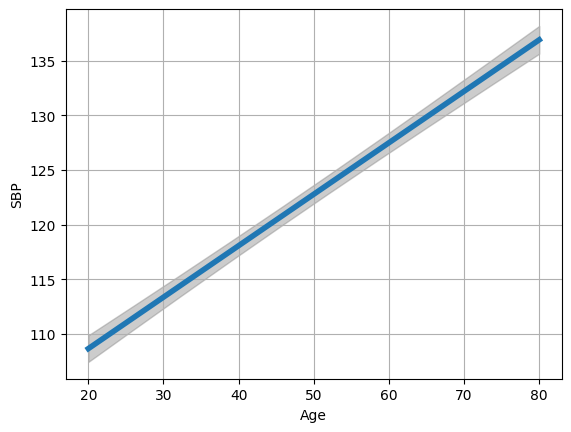

In [18]:
from statsmodels.sandbox.predict_functional import predict_functional

# Fix certain variables at reference values.  Not all of these
# variables are used here, but we provide them with a value anyway
# to prevent a warning message from appearing.
values = {"RIAGENDRx": "Female", "RIAGENDR": 1, "BMXBMI": 25,
          "DMDEDUC2": 1, "RIDRETH1": 1, "SMQ020": 1}

# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr, cb, fv = predict_functional(result, "RIDAGEYR",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(x=fv, y=pr, lw=4)
ax.grid(True)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
ax.set_ylabel("SBP");

An analogous plot for BMI is shown next.  Here we fix the gender as "female" and the age at 50, so we are looking
at the relationship between expected SBP and age for women of age 50.

In [19]:
da.groupby('BMXBMI').size()

BMXBMI
14.5    2
15.1    1
16.2    1
16.3    1
16.4    2
       ..
62.7    1
63.6    1
63.9    1
64.5    2
64.6    1
Length: 383, dtype: int64

In [20]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 BPXSY1   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     502.0
Date:                Sun, 30 Jun 2024   Prob (F-statistic):          8.54e-286
Time:                        04:03:06   Log-Likelihood:                -21461.
No. Observations:                5102   AIC:                         4.293e+04
Df Residuals:                    5098   BIC:                         4.296e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            91.5840      1.19

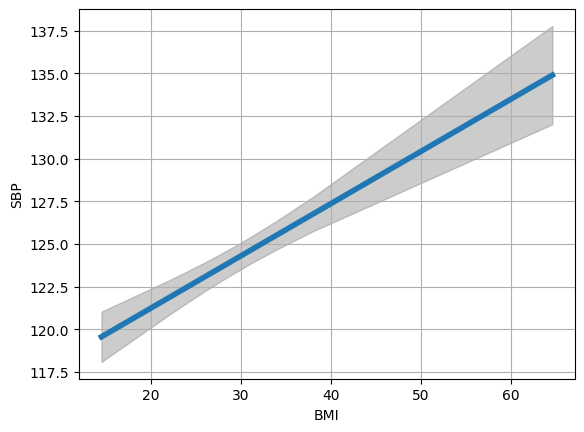

In [21]:

del values["BMXBMI"] # Delete this as it is now the focus variable
values["RIDAGEYR"] = 50
pr, cb, fv = predict_functional(result, "BMXBMI",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(x=fv, y=pr, lw=4)
ax.grid(True)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("BMI")
ax.set_ylabel("SBP");

The error band for BMI is notably wider than the error band for age, indicating that there is less certainty about the relationship between BMI and SBP compared to the relationship between age and SBP.

The discussion so far has primarily focused on the *mean structure* of the population, that is, the model for the average SBP of a person with a given age, gender, and BMI.  A regression model can also be used to assess the *variance structure* of the population, that is, how much and in what manner the observations deviate from their mean. We will focus on informal, graphical methods for assessing this.

To begin with, we plot the residuals against the fitted values. Recall that the fitted values are the estimated means for each observation, and the residuals are the difference between an observation and its estimated mean.  For example, the model may estimate that a 50 year old female will have on average an SBP of 125.  But a specific 50 year old female may have a blood pressure of 110 or 150, for example.  The fitted values for both of these women are 125, and their residuals are -15, and 25, respectively.

The simplest variance pattern that we can see in a linear regression occurs when the points are scattered around the mean, with the same degree of scatter throughout the range of the covariates.  When there are multiple covariates, it may be difficult to assess whether the variance is uniform throughout this range, but we can easily check for a "mean/variance relationship", in which there is a systematic relationship between the variance and the mean, i.e. the variance either increases or decreases systematically with the mean.  The plot of residuals on fitted values is used to assess whether such a mean/variance relationship is present.

Below we show the plot of residuals on fitted values for the NHANES
data.  It appears that we have a modestly increasing mean/variance
relationship.  That is, the scatter around the mean blood pressure is
greater when the mean blood pressure itself is greater.

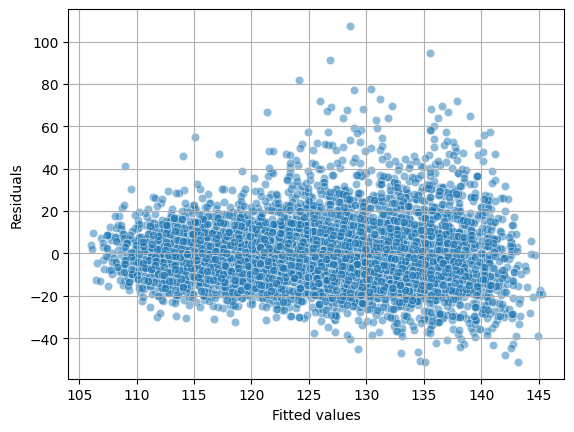

In [22]:
pp = sns.scatterplot(x=result.fittedvalues, y=result.resid,alpha=0.5)
pp.grid(True)
pp.set_xlabel("Fitted values")
pp.set_ylabel("Residuals");

A "component plus residual plot" or "partial residual plot" is intended to show how the data would look if all but one covariate could be fixed at reference values.  By controlling the values of these covariates, all remaining variation is due either to the "focus variable" (the one variable that is left unfixed, and is plotted on the horizontal axis), or to sources of variation that are unexplained by any of the covariates.

For example, the partial residual plot below shows how age (horizontal axis) and SBP (vertical axis) are related for fixed values of gender and BMI.  Note that the origin of the vertical axis in these plots is not meaningful (we are not implying that anyone's blood pressure would be negative), but the differences along the vertical axis are meaningful.  This plot implies that when BMI and gender are held fixed, the average blood pressures of an 80 and 18 year old differ by around 30 mm/Hg.  This plot also shows, as discussed above, that the deviations from the mean are somewhat smaller at the low end of the range compared to the high end of the range.  We also see that at the high end of the range, the deviations from the mean are somewhat right-skewed, with exceptionally high SBP values being more common than exceptionally low SBP values.

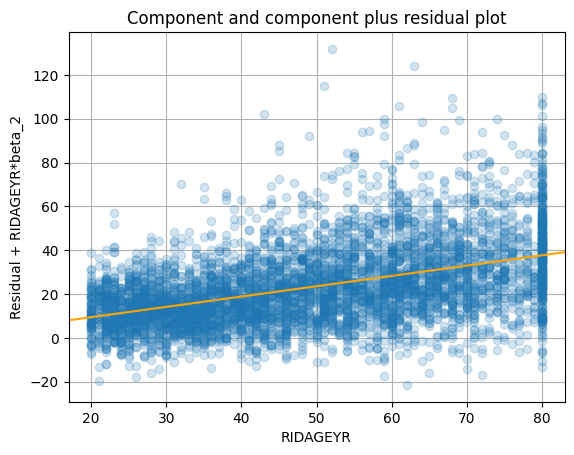

In [23]:
# This is not part of the main Statsmodels API, so needs to be imported separately
from statsmodels.graphics.regressionplots import plot_ccpr

ax = plt.axes()
plot_ccpr(result, "RIDAGEYR", ax)
ax.lines[0].set_alpha(0.2) # Reduce overplotting with transparency
ax.lines[1].set_color('orange')
ax.grid(True);

Next we have a partial residual plot that shows how BMI (horizontal
axis) and SBP (vertical axis) would be related if gender and age were
fixed.  Compared to the plot above, we see here that age is more
uniformly distributed than BMI.  Also, it appears that there is more
scatter in the partial residuals for BMI compared to what we saw above
for age. Thus there seems to be less information about SBP in BMI,
although a trend certainly exists.

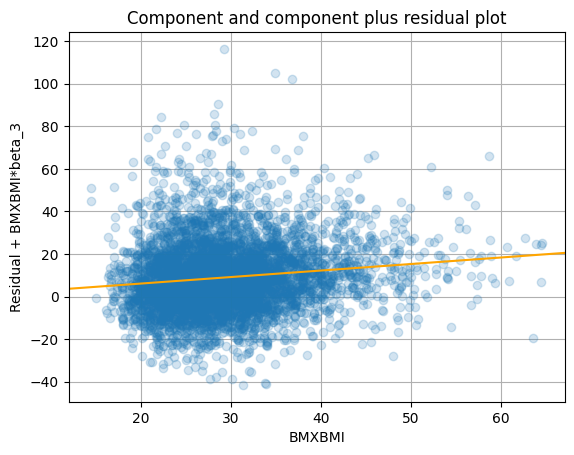

In [24]:
ax = plt.axes()
plot_ccpr(result, "BMXBMI", ax)
ax.lines[0].set_alpha(0.2)
ax.lines[1].set_color("orange")
ax.grid(True);

Another important plot used for understanding a regression model is an "added variable plot".  This is a plot
that may reveal nonlinearity in the relationship between one covariate and the outcome.  Below, we create
an added variable plot for age as a predictor of SBP.  Note that the two variables being plotted (age and blood pressure) have been centered.  The scale of the variables is unchanged, but the origin has been translated to zero.  The red line is an estimte of the relationship between age and blood pressure.  Unlike the relationship in the model, it is not forced to be linear, and there is in fact a hint that the shape is slightly flatter for the first 15 years or so of age.  This would imply that blood pressure increases slightly more slowly for people in theie 20s and early 30s, then begins increasing faster after that point.

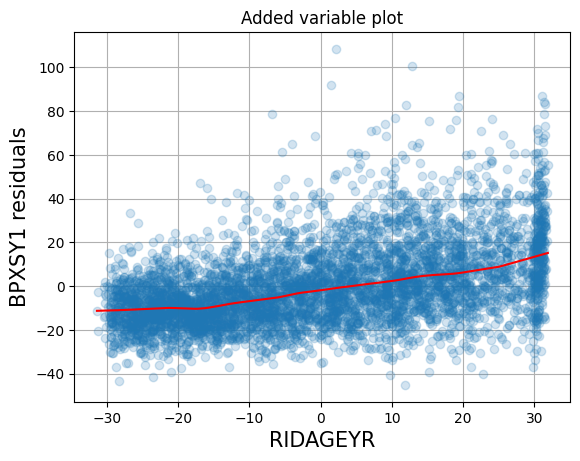

In [25]:
# This is not part of the main Statsmodels API, so needs to be imported separately
from statsmodels.graphics.regressionplots import add_lowess

# This is an equivalent way to fit a linear regression model, it needs to be
# done this way to be able to make the added variable plot
model = sm.GLM.from_formula("BPXSY1 ~ RIDAGEYR + BMXBMI + RIAGENDRx", data=da)
result = model.fit()
result.summary()

fig = result.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
add_lowess(ax)
ax.grid(True);

## Logistic regression

We now turn to regression models for *binary* outcome variables,
meaning an outcome that can take on only two distinct values.  For
illustration, we will work with the NHANES variable
[SMQ020](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/SMQ_I.htm#SMQ020),
which asks whether a person has smoked at least 100 cigarettes in
their lifetime (if this is the case, we say that the person has a
"smoking history").  Below we create a version of this variable in
which smoking and non-smoking are coded as 1 and 0, respectively, and
rare responses like *don't know* and *refused to answer* are coded as
missing values.

In [41]:
da["smq"] = da.SMQ020.replace({2: 0, 7: np.nan, 9: np.nan})
da["smq"].unique()

array([ 1.,  0., nan])

### Odds and log odds

Logistic regression provides us with a model for the *odds* of an event happening.  Recall that if an event has probability $p$, then the odds for this event is $p/(1-p)$.  The odds is a mathematical transformation of the probability onto a different scale.  For example, if the probability is 1/2, then the odds is 1.

To begin, we look at the odds of smoking for women and men separately.

In [27]:
c = pd.crosstab(da.RIAGENDRx, da.smq).apply(lambda x: x/x.sum(), axis=1)
c["odds"] = c.loc[:, 1] / c.loc[:, 0]
c

smq,0.0,1.0,odds
RIAGENDRx,,,
Female,0.680197,0.319803,0.470162
Male,0.467453,0.532547,1.139252


We see that the probability that a woman has ever smoked is substantially lower than the probability that a man has ever smoked (32% versus 53%).  This is reflected in the odds for a woman smoking being much less than 1 (around 0.47), while the odds for a man smoking is around 1.14.

It is common to work with *odds ratios* when comparing two groups. This is simply the odds for one group divided by the odds for the other group.  The odds ratio for smoking, comparing males to females, is around 2.4.  In other words, a man has around 2.4 times greater odds of smoking than a woman (in the population represented by these data).

In [28]:
c.odds.Male / c.odds.Female

2.423105552613186

It is conventional to work with odds on the logarithmic scale.  To understand the motivation for doing this, first note that the neutral point for a probability is 0.5, which is equivalent to an odds of 1 and a log odds of 0.  Populations where men smoke more than women will have odds between 1 and infinity, with the exact value depending on the specific female and male smoking rates.  Populations where women smoke more than men will have odds falling between 0 and 1.

We see that the scale of the odds statistic is not symmetric - in one direction the statistic falls between 0 and 1, and in the other direction the statistic falls between 1 and infinity.  It is usually arbitrary in which order we compare two groups -- we could compare men to women, or compare women to men.  An odds of 2 (men have twice the odds of smoking as women) is equivalent in strength to an odds of 1/2 (women have twice the odds of smoking as men).  Taking the log of the odds centers the scale at zero, and symmetrizes the interpretation of the scale.

To interpret the log odds when comparing two groups,
it is important to remember the following facts:

* A probability of 1/2, an odds of 1, and a log odds of 0 are all equivalent.

* A positive log odds indicates that the first group being compared has greater odds (and greater probability) than
the second group.

* A negative log odds indicates that the second group being compared has greater odds (and greater probability) than
the first group.

* The scale of the log odds statistic is symmetric in the sense that a log odds of, say, 2, is equivalent in strength to a
log odds of -2 (but with the groups swapped in terms of which has the greater probability).

If you know that the log odds when comparing two groups is a given value, say 2, and you want to report the odds, you simply exponentiate the log odds to get the odds, e.g. $\exp(2)$ is around 7.4. Note however that you cannot recover the individual probabilities (or their ratio) from an odds ratio.`

Below we show the log odds for smoking history status of females and males in the NHANES data.  The fact that the log odds for females is negative reflects that fact that substantially less than 50% of females have a history of smoking.  The log odds for males is closer to 0, consistent with around half of males having a history of smoking.

In [29]:
c["logodds"] = np.log(c.odds)
c

smq,0.0,1.0,odds,logodds
RIAGENDRx,,,,
Female,0.680197,0.319803,0.470162,-0.754679
Male,0.467453,0.532547,1.139252,0.130371


### A basic logistic regression model

Now that we have a clear understanding of log odds statistics, we will fit a logistic regression.  The dependent variable (outcome) of this initial model is smoking status, and the only covariate is gender. Thus, we are looking at gender as a predictor of smoking status.  We fit the model using the `GLM` function, where `GLM` stands for *Generalized Linear Model*.  Logistic regression is one type of GLM, but there are many other GLMs such as Poisson regression that we do not discuss further here.  As with linear regression, logistic models also include an intercept parameter, but we are not focusing on that parameter now.

In [30]:
model = sm.GLM.from_formula("smq ~ RIAGENDRx", family=sm.families.Binomial(), data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    smq   No. Observations:                 5094
Model:                            GLM   Df Residuals:                     5092
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3350.6
Date:                Sun, 30 Jun 2024   Deviance:                       6701.2
Time:                        04:03:09   Pearson chi2:                 5.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04557
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.7547      0.042    -18.071      0.000      -0.837      -0.673
RIAGENDRx[T.Male]     0.8851      0.058     15.227      0.000       0.771       0.999
=====================================================================================
"""

To see the connection between logistic regression and the log odds
statistic, note that the logistic regression coefficient for male
gender is exactly equal to the difference between the log odds
statistics for males and females: 0.130371-(-0.754679)=0.88505

In [31]:
c.logodds.Male - c.logodds.Female

0.8850500036644218

This relationship will always hold when conducting a logistic
regression with a single binary covariate.

In general, a logistic regression model will have multiple covariates
that may not be binary, but there is still an important connection
between logistic regression and odds ratios.  In this more general
setting, we will use a more general type of odds ratio, which we will
explore further next.

### Adding additional covariates

As with linear regression, we can include multiple covariates in a
logistic regression.  Below we fit a logistic regression for smoking
status using age (RIDAGEYR) and gender as covariates.

In [32]:
model = sm.GLM.from_formula("smq ~ RIDAGEYR + RIAGENDRx", family=sm.families.Binomial(), data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    smq   No. Observations:                 5094
Model:                            GLM   Df Residuals:                     5091
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3296.6
Date:                Sun, 30 Jun 2024   Deviance:                       6593.2
Time:                        04:03:10   Pearson chi2:                 5.10e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06558
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.6166      0.095    -16.985      0.000      -1.803      -1.430
RIAGENDRx[T.Male]     0.8920      0.059     15.170      0.000       0.777       1.007
RIDAGEYR              0.0172      0.002     10.289      0.000       0.014       0.021
=====================================================================================
"""

Adding age to the model leads to a very small shift in the gender
parameter (it changed from 0.885 to 0.892).  In general, regression
coefficients can change a lot when adding or removing other variables
from a model.  But in this case the change is quite minimal.  This
fitted model suggests that older people are more likely to have a
history of smoking than younger people.  The log odds for smoking
increases by 0.017 for each year of age.  This effect is additive, so
that comparing two people whose ages differ by 20 years, the log odds
of the older person smoking will be around 0.34 units greater than the
log odds for the younger person smoking, adn the odds for the older
person smoking will be around `exp(0.34) = 1.4` times greater than
the odds for the younger person smoking.

The greater prevalence of smoking history among older people could be
partly due to the definition of smoking status that we are using here -- an older person has
had more time to smoke 99 cigarettes than a younger person.  However
most people who smoke begin when they are young, and the smoking rate
in the US has been slowly declining for several decades.  Thus, it is
likely that the increased smoking levels in older people are driven
primarily by real shifts in behavior.

As with linear regression, the roles of age and gender in the logistic
regression model can be seen as being additive, but here the additivity
is on the scale of log odds, not odds or probabilities.  If we compare
a 30 year old female to a 50 year old male, the log odds for the male
being a smoker are $0.89 + 0.34 = 1.23$ units greater than the log odds
for the female being a smoker.  The value of 0.89 in this expression is
the change attributable to gender, and the value of 0.34 is the change
attributable to age.  Again, we can exponentiate to convert these
effects from the log odds scale to the odds scale.  Since
$\exp(0.89 + 0.34) = \exp(0.89)\cdot \exp(0.34) = 2.44\cdot 1.41$ we can state
that male gender is associated with a 2.44 fold increase in the odds
of smoking, and 20 years of age is associated with a 1.41 fold increase
in the odds for smoking.  These two effects are multiplied when
discussing the odds, so a 50 year old man has $\exp(1.23) = 3.42$ fold
greater odds of smoking than a 30 year old woman.

In this logistic regression model with two covariates, the
coefficients for age and gender both have interpretations in terms of
*conditional log odds*.  This generalizes the interpretation of a
logistic regression coefficient in terms of marginal log odds that we
discussed above.  When there are two or more covariates in a logistic
regression model, we always need to think in terms of conditional, not
marginal log odds.

Specifically, the coefficient of around 0.89 for male gender impacts the conditional
log odds in the sense that when comparing a male to a female at a
fixed age, the male will have 0.89 units greater log odds for smoking than
the female.  This relationship holds within any age (i.e. it holds
among all people of age 30, and among all people of age 70).  In this
sense, it is a *conditional* coefficient because it is only
interpretable when holding the other variables in the model fixed.
Similarly, the coefficient of around 0.02 for age holds within a
gender.  Comparing two females whose ages differ by one year, the
older female has 0.02 units greater log odds for smoking than the
younger female.  This same contrast holds for males.

### A logistic regression model with three predictors

Next we fit a logistic regression model, again for smoking, including
educational attainment as a predictor.  The educational attainment in
NHANES is called
[DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2),
and we will recode it so that the meaning of the levels becomes more
clear.  We will call the recoded variable `DMDEDUC2x`.

In [33]:
# Create a labeled version of the educational attainment variable
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "lt9", 2: "x9_11", 3: "HS", 4: "SomeCollege",
                                       5: "College", 7: np.nan, 9: np.nan})

model = sm.GLM.from_formula("smq ~ RIDAGEYR + RIAGENDRx + DMDEDUC2x", family=sm.families.Binomial(), data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    smq   No. Observations:                 5093
Model:                            GLM   Df Residuals:                     5086
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3201.2
Date:                Sun, 30 Jun 2024   Deviance:                       6402.4
Time:                        04:03:10   Pearson chi2:                 5.10e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09976
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -2.3060      0.114    -20.174      0.000      -2.530      -2.082
RIAGENDRx[T.Male]            0.9096      0.060     15.118      0.000       0.792       1.028
DMDEDUC2x[T.HS]              0.9434      0.090     10.521      0.000       0.768       1.119
DMDEDUC2x[T.SomeCollege]     0.8322      0.084      9.865      0.000       0.667       0.998
DMDEDUC2x[T.lt9]             0.2662      0.109      2.438      0.015       0.052       0.480
DMDEDUC2x[T.x9_11]           1.0986      0.107     10.296      0.000       0.889       1.308
RIDAGEYR                     0.0183      0.002     10.582      0.000       0.015       0.022
============================================================================================
"""

We see that the "Female" level of the gender variable, and the "College" level of the educational attainment variable are the reference levels, as they are not shown in the output above.  We have discussed the gender and age variables above, but the educational attainment variable is new for us.  All non-reference coefficients for the educational attainment are positive, while the `College` coefficient, as the reference coefficient, is exactly zero.  Thus, we see that people with a college degree have the lowest rate of smoking, followed by people with less than 9 years of schooling, then
(after a large gap) people with some college, then people with a high school degree (and no college), and finally (with the greatest rate of smoking), people with 9-11 years of schooling.  The overall story here is that smoking rates
are much lower for people who graduated from college or did not start high school, presumably for very different reasons.  On the other hand, people with some high school, people who completed high school, and people who began but did not complete college have much higher rates of smoking.  The odds ratio between the former and the latter group depends on the specific subgroups being compared, but can be almost $3 = \exp(1.09)$.

As noted above when we were discussing linear regression, it is important to remember that a coefficient in a logistic regression are "conditional" on the other variables being held fixed.  For example, the log odds ratio of 1.09 between people with 9-11 years of schooling and people who completed college applies only when comparing people with the same age and gender.

### Visualization of the fitted models

Visualization of fitted logistic regression models is more challenging than visualization of fitted linear models, but is still worth pursuing.  We can begin by plotting the fitted proportion of the population that smokes, for various subpopulations defined by the regression model.  We will focus here on how the smoking rate varies with age, so we restrict the population to female college graduates.

The following plot shows the fitted log odds (or logit) probability for the smoking outcome as a function of age.  The grey band is a simultaneous 95% simultaneous confidence band, as discussed above in the case of a linear model.

Single Confidence Interval:

    When you construct a confidence interval for a single estimate, you typically set the confidence level (e.g., 95%). This means there's a 95% chance that the interval contains the true value.

Multiple Confidence Intervals:

    When you make multiple predictions, constructing individual 95% confidence intervals for each prediction might not give you a 95% confidence level for all intervals simultaneously. Instead, the overall confidence level would be less than 95% because of the multiple comparisons problem.

Simultaneous Confidence Intervals:

    To address this, simultaneous confidence intervals are adjusted to ensure that the overall confidence level across all intervals remains at the desired level (e.g., 95%). This involves a more conservative adjustment, making the intervals wider than they would be for individual predictions.

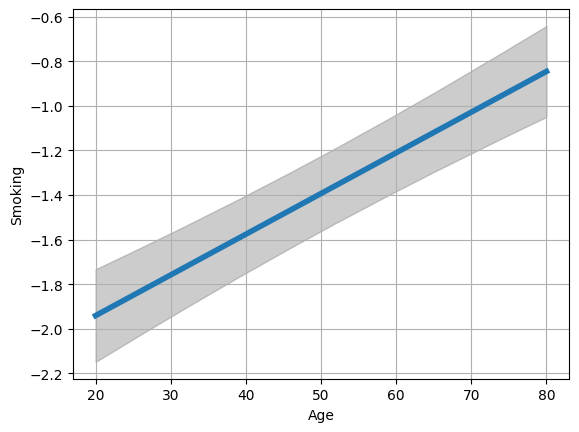

In [34]:
values = {"RIAGENDRx": "Female", "RIAGENDR": 1, "BMXBMI": 25,
          "DMDEDUC2": 1, "RIDRETH1": 1, "SMQ020": 1,
          "DMDEDUC2x": "College", "BPXSY1": 120}

pr, cb, fv = predict_functional(result, "RIDAGEYR",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(x=fv, y=pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
ax.set_ylabel("Smoking")
ax.grid(True);

We can display the same plot in terms of probabilities instead of in
terms of log odds.  The probability can be obtained from the log odds
using the relationship $p = 1 / (1 + \exp(-o))$ where $o$ is the log
odds.  Note that while the age and log odds are linearly related, age
has a curved relationship with probability.  This is necessary since
probabilities must remain between 0 and 1, a linear relationship would
eventually exit this interval.

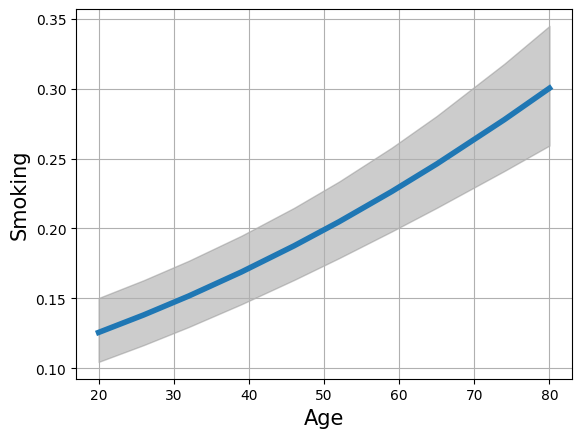

In [35]:
pr1 = 1 / (1 + np.exp(-pr))
cb1 = 1 / (1 + np.exp(-cb))
ax = sns.lineplot(x=fv, y=pr1, lw=4)
ax.fill_between(fv, cb1[:, 0], cb1[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age", size=15)
ax.set_ylabel("Smoking", size=15)
ax.grid(True);

Next we turn to diagnostic plots that are intended to reveal certain
aspects of the data that may not be correctly captured by the model.
The three plots below are intended to reveal any curvature in the mean
relationship between the outcome and one of the covariates. We used
the partial regression plotting technique above for this same purpose
when working with linear models.

In the case of logistic regression, the three techniques demonstrated below (partial residual plots, added variable plots, and CERES plots) can identify major discrepancies between the fitted model and the population, but evidence for small discrepancies is not reliable unless the sample size is very large.  Among the three methods, the CERES technique has the strongest theoretical support.  Taken at face value, the plots below suggest that smoking rates may rise slightly faster for people between the ages of 20 and 35, and again for people between the ages of 50 and 60, with a period of minimal increase between these age intervals.  This would contradict the perfectly linear model for age (on the log odds scale) that we have specified in our model. These plotting techniques can be useful at identifying possible opportunities for future analysis with additional data, but do not identify features that can be claimed with high confidence using the present data.

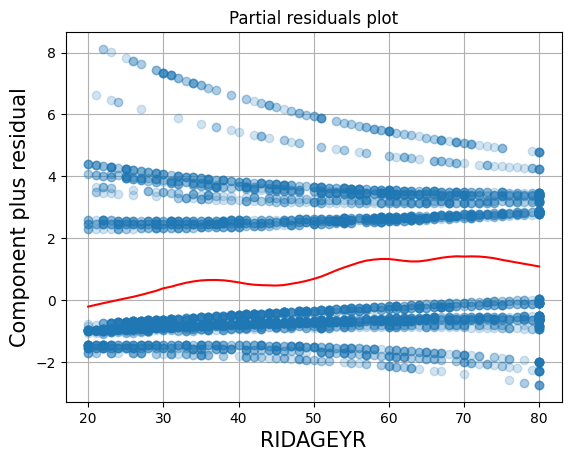

In [36]:
fig = result.plot_partial_residuals("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
add_lowess(ax)
ax.grid(True);

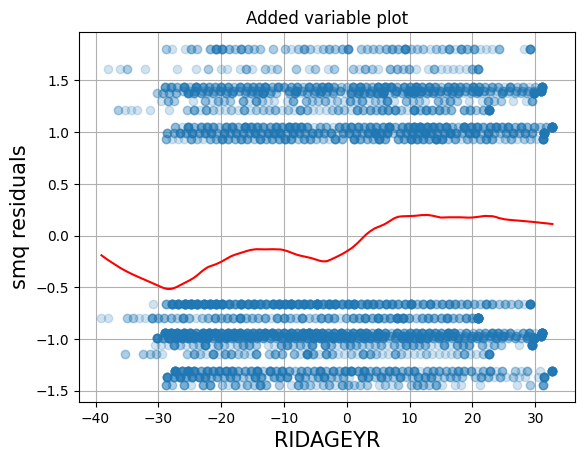

In [37]:
fig = result.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
add_lowess(ax)
ax.grid(True);

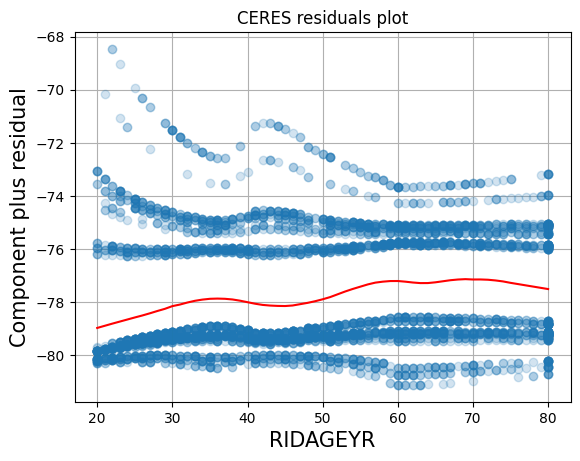

In [38]:
fig = result.plot_ceres_residuals("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
add_lowess(ax)
ax.grid(True);